**Initialization of Libraries**

In [34]:
import sys
assert sys.version_info >= (3,5)

In [35]:
import sklearn
assert sklearn.__version__ >= "0.20"

In [36]:
import pandas as pd

In [37]:
import numpy as np

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
from sklearn.preprocessing import OrdinalEncoder

In [40]:
from pandas.plotting import scatter_matrix

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [42]:
import time

In [43]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB 
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB

In [46]:
from sklearn.model_selection import cross_val_score

**Importing all required Datasets**

In [47]:
binary_class_x_train=pd.read_csv('./Traffic_Sign/Binary_Classification/x_train_bin.csv')
binary_class_y_train=pd.read_csv('./Traffic_Sign/Binary_Classification/y_train_bin.csv')
binary_class_x_test=pd.read_csv('./Traffic_Sign/Binary_Classification/x_test_bin.csv')
binary_class_y_test=pd.read_csv('./Traffic_Sign/Binary_Classification/y_test_bin.csv')

complete_x_train=pd.read_csv('./Traffic_Sign/CompleteDataSet/x_train_all.csv')
complete_y_train=pd.read_csv('./Traffic_Sign/CompleteDataSet/y_train_all.csv')
complete_x_test=pd.read_csv('./Traffic_Sign/CompleteDataSet/x_test_all.csv')
complete_y_test=pd.read_csv('./Traffic_Sign/CompleteDataSet/y_test_all.csv')

onevsall_y_train_0=pd.read_csv('./Traffic_Sign/OnevrsAll/0_vrs_all/y_train_0.csv')
onevsall_y_train_1=pd.read_csv('./Traffic_Sign/OnevrsAll/1_vrs_all/y_train_1.csv')
onevsall_y_train_2=pd.read_csv('./Traffic_Sign/OnevrsAll/2_vrs_all/y_train_2.csv')
onevsall_y_train_3=pd.read_csv('./Traffic_Sign/OnevrsAll/3_vrs_all/y_train_3.csv')
onevsall_y_train_4=pd.read_csv('./Traffic_Sign/OnevrsAll/4_vrs_all/y_train_4.csv')
onevsall_y_train_5=pd.read_csv('./Traffic_Sign/OnevrsAll/5_vrs_all/y_train_5.csv')
onevsall_y_train_6=pd.read_csv('./Traffic_Sign/OnevrsAll/6_vrs_all/y_train_6.csv')
onevsall_y_train_7=pd.read_csv('./Traffic_Sign/OnevrsAll/7_vrs_all/y_train_7.csv')
onevsall_y_train_8=pd.read_csv('./Traffic_Sign/OnevrsAll/8_vrs_all/y_train_8.csv')
onevsall_y_train_9=pd.read_csv('./Traffic_Sign/OnevrsAll/9_vrs_all/y_train_9.csv')

# Specs assumes 0 is true and 1 is false. So we have to reverse that

def inverse_num(i):
    if i == 1: return 0
    else: return 1

onevsall_y_train_0 = [[inverse_num(i)] for i in onevsall_y_train_0.copy().to_numpy()]
onevsall_y_train_1 = [[inverse_num(i)] for i in onevsall_y_train_1.copy().to_numpy()]
onevsall_y_train_2 = [[inverse_num(i)] for i in onevsall_y_train_2.copy().to_numpy()]
onevsall_y_train_3 = [[inverse_num(i)] for i in onevsall_y_train_3.copy().to_numpy()]
onevsall_y_train_4 = [[inverse_num(i)] for i in onevsall_y_train_4.copy().to_numpy()]
onevsall_y_train_5 = [[inverse_num(i)] for i in onevsall_y_train_5.copy().to_numpy()]
onevsall_y_train_6 = [[inverse_num(i)] for i in onevsall_y_train_6.copy().to_numpy()]
onevsall_y_train_7 = [[inverse_num(i)] for i in onevsall_y_train_7.copy().to_numpy()]
onevsall_y_train_8 = [[inverse_num(i)] for i in onevsall_y_train_8.copy().to_numpy()]
onevsall_y_train_9 = [[inverse_num(i)] for i in onevsall_y_train_9.copy().to_numpy()]

**Visualization and Initial Data Exploration**

Basic description of Complete x and y datasets

In [48]:
complete_x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,96.0,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,98.0,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,112.0,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,100.0,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0


In [49]:
complete_y_train.head()

,0
0,0
1,0
2,0
3,0
4,0


In [50]:
complete_x_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
count,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,...,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.00000,9690.000000,9690.000000,9690.000000
mean,89.658514,89.545201,89.343756,89.566770,89.812590,89.853251,89.883282,89.978431,90.170175,90.519092,...,72.234881,71.833437,71.394118,70.572136,69.660165,68.878638,68.29453,67.831889,67.548297,67.393189
std,77.521341,77.430539,77.350452,77.498754,77.437292,77.279125,77.085714,77.081732,77.062371,77.155644,...,65.369022,65.439225,65.402298,65.144238,64.885963,64.530366,64.27455,63.799350,63.437102,63.506304
min,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.00000,5.000000,4.000000,4.000000
25%,32.000000,32.000000,32.000000,31.000000,32.000000,32.000000,32.000000,33.000000,33.000000,33.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,25.000000,25.00000,25.000000,25.000000,25.000000
50%,57.000000,58.000000,57.000000,58.000000,58.000000,58.000000,58.000000,58.000000,59.000000,59.000000,...,46.000000,46.000000,46.000000,45.000000,45.000000,44.000000,44.00000,43.000000,43.000000,43.000000
75%,126.000000,124.000000,122.750000,123.000000,125.000000,123.750000,124.000000,124.000000,124.000000,126.000000,...,95.000000,93.000000,91.000000,88.000000,86.000000,84.000000,82.00000,82.000000,81.000000,81.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000


In [51]:
complete_y_train.describe()

,0
count,9690.000000
mean,3.148607
std,2.177158
min,0.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,9.000000


In [ ]:
# final_dataset = complete_x_train.copy()
# final_dataset['class']=complete_y_train.copy()
# final_dataset
# b0 = final_dataset[final_dataset['class']==0]
# b1 = final_dataset[final_dataset['class']==1]
# b2 = final_dataset[final_dataset['class']==2]
# b3 = final_dataset[final_dataset['class']==3]
# b4 = final_dataset[final_dataset['class']==4]
# b5 = final_dataset[final_dataset['class']==5]
# b6 = final_dataset[final_dataset['class']==6]
# b7 = final_dataset[final_dataset['class']==7]
# b8 = final_dataset[final_dataset['class']==8]
# b9 = final_dataset[final_dataset['class']==9]

In [54]:
complete_x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9690 entries, 0 to 9689
Columns: 2304 entries, 0 to 2303
dtypes: float64(2304)
memory usage: 170.3 MB


In [55]:
complete_y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9690 entries, 0 to 9689
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       9690 non-null   int64
dtypes: int64(1)
memory usage: 75.8 KB


In [56]:
complete_x_train.isnull().values.any()

False

In [57]:
complete_y_train.isnull().values.any()

False

In [58]:
complete_x_test.isnull().values.any()

False

In [59]:
complete_y_test.isnull().values.any()

False

Visualisation of a single image

In [60]:
complete_x_train.iloc[0].to_numpy().reshape(48,48)

array([[ 78.,  77.,  76., ...,  68.,  67.,  67.],
       [ 81.,  79.,  78., ...,  72.,  72.,  72.],
       [ 84.,  83.,  81., ...,  77.,  78.,  79.],
       ...,
       [ 98.,  99., 100., ..., 109., 104., 101.],
       [ 90.,  94., 100., ..., 103., 100.,  97.],
       [ 85.,  92., 102., ...,  98.,  95.,  94.]])

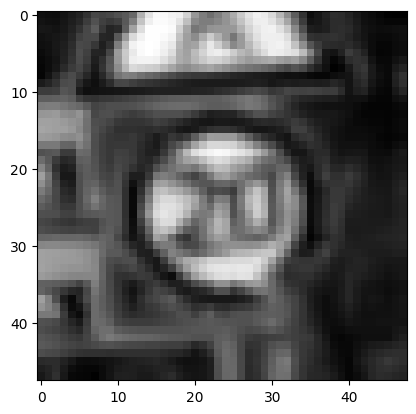

In [61]:
plt.imshow(complete_x_train.iloc[0].to_numpy().reshape(48,48),cmap="grey")

Visualisation of images from each class

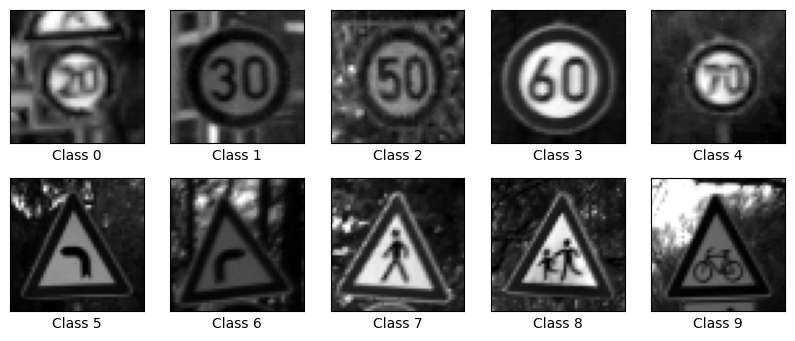

In [62]:
img_toshow = [0,210,2435,6085,7030,8275,8635,8875,9415,9685]

plt.figure(figsize=(10,4))

for i in range (0, len(img_toshow)):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(complete_x_train.iloc[img_toshow[i]].to_numpy().reshape(48,48), cmap='gray')
    plt.xlabel("Class "+str(complete_y_train.iloc[img_toshow[i]].to_numpy()[0]))

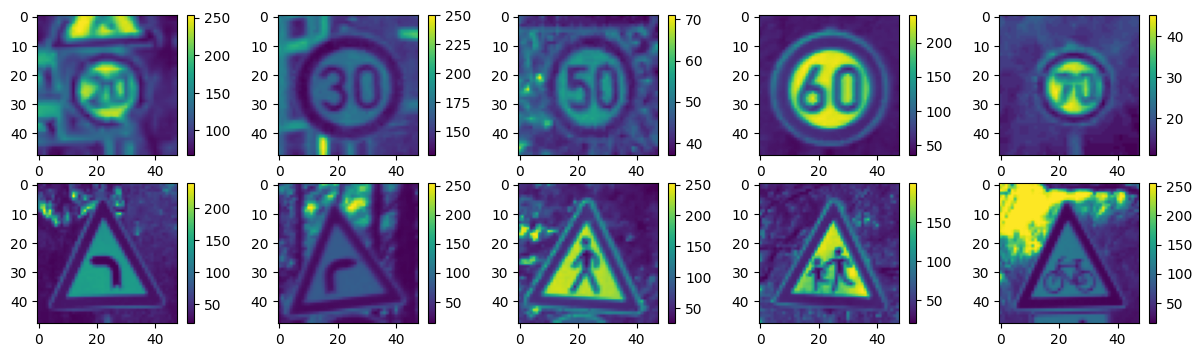

In [63]:
plt.figure(figsize=(15,4))
for i in range (0, len(img_toshow)):
    plt.subplot(2,5,i+1)
    plt.grid(False)
    plt.imshow(complete_x_train.iloc[img_toshow[i]].to_numpy().reshape(48,48))
    plt.colorbar()
    plt.grid(False)

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
attr = np.array(complete_x_test.columns)
complete_x_train[attr] = pd.DataFrame(scaler.fit_transform(complete_x_train.values),columns=attr)

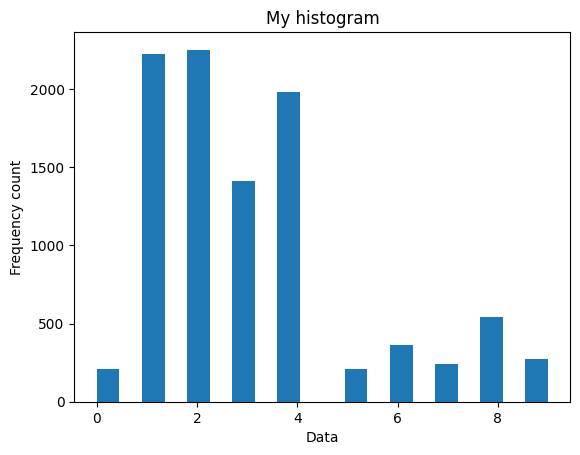

In [65]:
# plt.figure(bin=50)
plt.hist(complete_y_train["0"],bins=20)
plt.ylabel('Frequency count')
plt.xlabel('Data')
plt.title('My histogram')
plt.show()


In [66]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
# df = pd.DataFrame(complete_y_train)
# plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
# sns.heatmap(df, annot=True, cmap="YlGnBu", fmt=".0f")  # Use 'fmt' to specify the number format for annotation

# plt.title('Heatmap Example')
# plt.show()

Corelation with final category

In [ ]:
final_dataset = complete_x_train.copy()
final_dataset['class']=complete_y_train.copy()
final_dataset

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,class
0,0.292,0.288,0.286853,0.308,0.328,0.348,0.396,0.458167,0.450199,0.462151,...,0.298805,0.270916,0.284,0.314741,0.362550,0.378486,0.372,0.362550,0.358566,0
1,0.272,0.280,0.298805,0.292,0.284,0.280,0.336,0.410359,0.513944,0.482072,...,0.354582,0.322709,0.288,0.258964,0.274900,0.314741,0.380,0.386454,0.386454,0
2,0.268,0.280,0.298805,0.288,0.304,0.336,0.400,0.418327,0.326693,0.342629,...,0.362550,0.334661,0.300,0.274900,0.266932,0.278884,0.300,0.338645,0.362550,0
3,0.248,0.260,0.278884,0.300,0.352,0.408,0.420,0.366534,0.258964,0.382470,...,0.350598,0.330677,0.308,0.290837,0.270916,0.262948,0.268,0.306773,0.334661,0
4,0.276,0.276,0.274900,0.268,0.288,0.328,0.396,0.418327,0.318725,0.314741,...,0.374502,0.378486,0.380,0.378486,0.338645,0.294821,0.244,0.254980,0.270916,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9685,0.968,0.860,0.996016,0.832,0.496,0.812,0.996,1.000000,1.000000,1.000000,...,0.099602,0.091633,0.084,0.083665,0.075697,0.071713,0.084,0.087649,0.091633,9
9686,0.584,0.452,0.996016,1.000,1.000,1.000,0.996,0.996016,0.996016,0.988048,...,0.107570,0.103586,0.100,0.103586,0.103586,0.099602,0.084,0.095618,0.091633,9
9687,1.000,1.000,1.000000,1.000,1.000,1.000,1.000,1.000000,1.000000,1.000000,...,0.179283,0.151394,0.124,0.115538,0.127490,0.139442,0.104,0.139442,0.155378,9
9688,1.000,0.992,1.000000,1.000,1.000,1.000,1.000,1.000000,1.000000,1.000000,...,0.091633,0.087649,0.088,0.123506,0.095618,0.091633,0.084,0.087649,0.079681,9


In [ ]:
# final_corr = final_dataset.corr()

In [ ]:
# final_corr['class'].sort_values(ascending=False)[0:10]

Balancing out the dataset

In [ ]:
b0 = final_dataset[final_dataset['class']==0]
b1 = final_dataset[final_dataset['class']==1]
b2 = final_dataset[final_dataset['class']==2]
b3 = final_dataset[final_dataset['class']==3]
b4 = final_dataset[final_dataset['class']==4]
b5 = final_dataset[final_dataset['class']==5]
b6 = final_dataset[final_dataset['class']==6]
b7 = final_dataset[final_dataset['class']==7]
b8 = final_dataset[final_dataset['class']==8]
b9 = final_dataset[final_dataset['class']==9]

sizes = [len(b0),len(b1),len(b2),len(b3),len(b4),len(b5),len(b6),len(b7),len(b8),len(b9)]
min_size = int(sum(sizes)/10)

balanced_out_data = pd.concat([b0[0:min_size],b1[0:min_size],b2[0:min_size],b3[0:min_size],b4[0:min_size],b5[0:min_size],b6[0:min_size],b7[0:min_size],b8[0:min_size],b9[0:min_size]])

balanced_out_data_x = balanced_out_data.iloc[:,:2304]
balanced_out_data_y = balanced_out_data.iloc[:,2304:]


**Naïve Bayes Classifier**

In [ ]:
# clf = GaussianNB()
# clf = MultinomialNB()
clf = ComplementNB()
# clf = CategoricalNB(min_categories=10) 

clf.fit(balanced_out_data_x,balanced_out_data_y)
complete_y_pred = clf.predict(complete_x_test)

print("Accuracy:", accuracy_score(complete_y_test, complete_y_pred))
print("Precision: " , precision_score(complete_y_test, complete_y_pred, average='weighted'))
print('Recall score: ', recall_score(complete_y_test, complete_y_pred, average='weighted'))
print('F-measure: ', f1_score(complete_y_test, complete_y_pred, average='weighted'))
print(classification_report(complete_y_test, complete_y_pred))

Accuracy: 0.3
Precision:  0.38526502472246016
Recall score:  0.3
F-measure:  0.23581360168983312
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.51      0.12      0.20       720
           2       0.30      0.70      0.42       750
           3       0.23      0.52      0.32       450
           4       0.53      0.06      0.11       660
           5       0.00      0.00      0.00        60
           6       0.00      0.00      0.00        90
           7       1.00      0.05      0.10        60
           8       0.56      0.27      0.36       150
           9       0.00      0.00      0.00        90

    accuracy                           0.30      3090
   macro avg       0.31      0.17      0.15      3090
weighted avg       0.39      0.30      0.24      3090



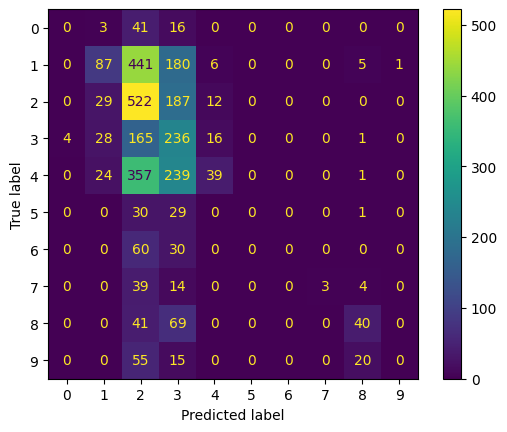

True Positive Rate:  1.0
False Positive Rate:  0.0


In [ ]:
conf_matrix = confusion_matrix(complete_y_test, complete_y_pred)
class_names = list(set(complete_y_test) | set(complete_y_pred))
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot()
plt.show()

tpr = conf_matrix[1,1]/(conf_matrix[1,1]+conf_matrix[1,0]) #True Positive Rate
fpr = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1]) #False Positive Rate
print("True Positive Rate: ", tpr)
print("False Positive Rate: ", fpr)

In [ ]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = 2304)
X2D = pca.fit_transform(balanced_out_data_x)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [ ]:
pca = PCA(n_components = d)
X_reduced = pd.DataFrame(pca.fit_transform(balanced_out_data_x))

In [ ]:
X_recovered = pd.DataFrame(pca.inverse_transform(X_reduced))
X_recovered[X_recovered < 0] = 0

In [ ]:
clf = ComplementNB()

clf.fit(X_recovered, balanced_out_data_y)
complete_y_pred = clf.predict(complete_x_test)

print("Accuracy:", accuracy_score(complete_y_test, complete_y_pred))
print("Precision: " , precision_score(complete_y_test, complete_y_pred, average='weighted'))
print('Recall score: ', recall_score(complete_y_test, complete_y_pred, average='weighted'))
print('F-measure: ', f1_score(complete_y_test, complete_y_pred, average='weighted'))
print(classification_report(complete_y_test, complete_y_pred))

Accuracy: 0.2993527508090615
Precision:  0.3804553256366253
Recall score:  0.2993527508090615
F-measure:  0.23568887677660344
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.51      0.12      0.20       720
           2       0.30      0.70      0.42       750
           3       0.23      0.52      0.32       450
           4       0.51      0.06      0.11       660
           5       0.00      0.00      0.00        60
           6       0.00      0.00      0.00        90
           7       1.00      0.05      0.10        60
           8       0.56      0.27      0.36       150
           9       0.00      0.00      0.00        90

    accuracy                           0.30      3090
   macro avg       0.31      0.17      0.15      3090
weighted avg       0.38      0.30      0.24      3090



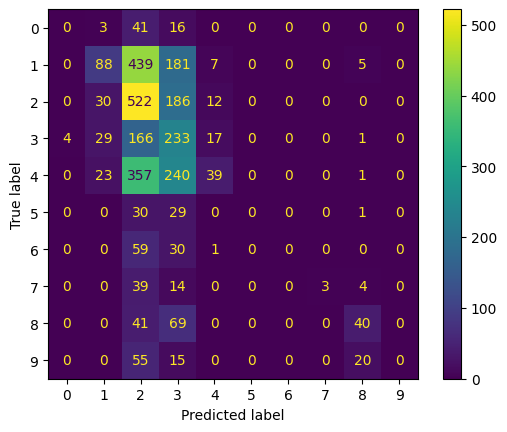

True Positive Rate:  1.0
False Positive Rate:  0.0


In [ ]:
conf_matrix = confusion_matrix(complete_y_test, complete_y_pred)
class_names = list(set(complete_y_test) | set(complete_y_pred))
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot()
plt.show()

tpr = conf_matrix[1,1]/(conf_matrix[1,1]+conf_matrix[1,0]) #True Positive Rate
fpr = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1]) #False Positive Rate
print("True Positive Rate: ", tpr)
print("False Positive Rate: ", fpr)

**Methods to select the top correlating features**

In [ ]:
class_arr_data = [
                onevsall_y_train_0.copy(),
                onevsall_y_train_1.copy(),
                onevsall_y_train_2.copy(),
                onevsall_y_train_3.copy(),
                onevsall_y_train_4.copy(),
                onevsall_y_train_5.copy(),
                onevsall_y_train_6.copy(),
                onevsall_y_train_7.copy(),
                onevsall_y_train_8.copy(),
                onevsall_y_train_9.copy()
            ]

x_data = complete_x_train.copy()

In [ ]:
def getTopFeatureMethod1(x):
    return_arr = []
    for i in class_arr_data:
        bestfeatures = SelectKBest(score_func=chi2, k=x//len(class_arr_data))
        fit = bestfeatures.fit(x_data,i)
        dfscores = pd.DataFrame(fit.scores_)
        dfcolumns = pd.DataFrame(x_data.columns)
        featureScores = pd.concat([dfcolumns,dfscores],axis=1)
        featureScores.columns = ['Specs','Score']
        return_arr = np.unique(np.concatenate((return_arr,featureScores.nlargest(x//len(class_arr_data),'Score')['Specs']),0))
    return return_arr

In [ ]:
def getTopFeatureMethod2(x):
    features_array = [[]]*10
    return_arr = [[]]*3
    for i in range (0,len(class_arr_data)):
        bestfeatures = SelectKBest(score_func=chi2, k=x//len(class_arr_data))
        fit = bestfeatures.fit(x_data,class_arr_data[i])
        dfscores = pd.DataFrame(fit.scores_)
        dfcolumns = pd.DataFrame(x_data.columns)
        featureScores = pd.concat([dfcolumns,dfscores],axis=1)
        featureScores.columns = ['Specs','Score']
        features_array[i]=featureScores.nlargest(x//len(class_arr_data),'Score')['Specs']
    for i in range (0,10):
        return_arr[0] = np.unique(np.concatenate((return_arr[0], features_array[i][0:x//len(class_arr_data)]),0))
        return_arr[1] = np.unique(np.concatenate((return_arr[1], features_array[i][0:x//(len(class_arr_data)*2)]),0))
        return_arr[2] = np.unique(np.concatenate((return_arr[2], features_array[i][0:x//(len(class_arr_data)*4)]),0))
    return return_arr

In [ ]:
# pip install mlxtend

In [ ]:
# from mlxtend.feature_selection import ExhaustiveFeatureSelector
# from sklearn.ensemble import RandomForestClassifier

# def getTopFeaturesMethod3(x):
#     efs = ExhaustiveFeatureSelector(RandomForestClassifier(),
#                                     min_features=150,
#                                     max_features=200,
#                                     scoring="roc_auc",
#                                     cv=2)
#     efs=efs.fit(x_data,class_arr_data[i])
#     selected_features=complete_x_test.columns[list(efs.best_idx)]
#     print(selected_features)
# getTopFeaturesMethod3()

**Running Naïve Bayes Classifier on the datasets produced by running the methods mentioned in above section**

In [ ]:
start_time = time.time()
temp1 = getTopFeatureMethod1(200)
temp2 = getTopFeatureMethod1(100)
temp3 = getTopFeatureMethod1(50)
print(time.time()-start_time)

start_time = time.time()
temp = getTopFeatureMethod2(200)
print(time.time()-start_time)

1.9957749843597412
0.6952970027923584


In [ ]:
dataset1_method_1 = complete_x_train.copy()[temp1]
dataset2_method_1 = complete_x_train.copy()[temp2]
dataset3_method_1 = complete_x_train.copy()[temp3]

dataset1_method_2 = complete_x_train.copy()[temp[0]]
dataset2_method_2 = complete_x_train.copy()[temp[1]]
dataset3_method_2 = complete_x_train.copy()[temp[2]]

dataset1_test = complete_x_test.copy()[temp[0]]
dataset2_test = complete_x_test.copy()[temp[1]]
dataset3_test = complete_x_test.copy()[temp[2]]

In [ ]:
t1 = b0.copy()[temp3]
t1.describe()

,1030,1073,1074,1120,1121,1134,1167,1168,1215,1216,...,2262,2263,2266,2268,744,745,746,793,794,983
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,...,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,0.314514,0.646841,0.649761,0.679638,0.681985,0.663867,0.667048,0.691886,0.667467,0.684949,...,0.585980,0.585259,0.559799,0.550237,0.687788,0.692286,0.687276,0.705069,0.680800,0.383515
std,0.161489,0.169830,0.177551,0.179373,0.173403,0.197574,0.193631,0.183125,0.194696,0.190793,...,0.279618,0.282310,0.274228,0.269978,0.210677,0.202342,0.196929,0.193060,0.183106,0.160780
min,0.052000,0.286853,0.269076,0.316000,0.365462,0.192000,0.244000,0.304000,0.256000,0.293173,...,0.079681,0.071713,0.079681,0.099602,0.076613,0.076000,0.068000,0.080645,0.084000,0.084337
25%,0.176000,0.513944,0.507028,0.504000,0.526104,0.484000,0.485000,0.510000,0.481000,0.502008,...,0.322709,0.322709,0.315737,0.327689,0.513105,0.532000,0.540000,0.549395,0.548000,0.273092
50%,0.316000,0.629482,0.624498,0.692000,0.680723,0.644000,0.660000,0.720000,0.664000,0.708835,...,0.621514,0.605578,0.537849,0.507968,0.645161,0.660000,0.668000,0.693548,0.640000,0.351406
75%,0.443000,0.788845,0.799197,0.836000,0.819277,0.844000,0.845000,0.868000,0.848000,0.870482,...,0.835657,0.856574,0.795817,0.775896,0.910282,0.908000,0.888000,0.907258,0.863000,0.481928
max,0.788000,0.964143,0.963855,0.968000,0.963855,0.956000,0.972000,0.972000,0.964000,0.963855,...,1.000000,1.000000,1.000000,1.000000,0.987903,0.984000,0.988000,0.987903,0.980000,0.883534


In [ ]:
clf = MultinomialNB()

clf.fit(dataset1_method_1, complete_y_train)
complete_y_pred = clf.predict(dataset1_test)

print("Accuracy:", accuracy_score(complete_y_test, complete_y_pred))
print("Precision: " , precision_score(complete_y_test, complete_y_pred, average='weighted'))
print('Recall score: ', recall_score(complete_y_test, complete_y_pred, average='weighted'))
print('F-measure: ', f1_score(complete_y_test, complete_y_pred, average='weighted'))
print(classification_report(complete_y_test, complete_y_pred))

Accuracy: 0.4935275080906149
Precision:  0.5643836564653271
Recall score:  0.4935275080906149
F-measure:  0.5084689189262611
              precision    recall  f1-score   support

           0       0.06      0.33      0.10        60
           1       0.63      0.41      0.50       720
           2       0.66      0.51      0.58       750
           3       0.66      0.53      0.59       450
           4       0.45      0.60      0.52       660
           5       0.49      0.93      0.64        60
           6       0.30      0.32      0.31        90
           7       0.44      0.50      0.47        60
           8       0.58      0.17      0.26       150
           9       0.35      0.57      0.44        90

    accuracy                           0.49      3090
   macro avg       0.46      0.49      0.44      3090
weighted avg       0.56      0.49      0.51      3090



In [ ]:
clf = MultinomialNB()

clf.fit(dataset2_method_1, complete_y_train)
complete_y_pred = clf.predict(dataset2_test)

print("Accuracy:", accuracy_score(complete_y_test, complete_y_pred))
print("Precision: " , precision_score(complete_y_test, complete_y_pred, average='weighted'))
print('Recall score: ', recall_score(complete_y_test, complete_y_pred, average='weighted'))
print('F-measure: ', f1_score(complete_y_test, complete_y_pred, average='weighted'))
print(classification_report(complete_y_test, complete_y_pred))

Accuracy: 0.5048543689320388
Precision:  0.5695322487488954
Recall score:  0.5048543689320388
F-measure:  0.5216346162121759
              precision    recall  f1-score   support

           0       0.06      0.32      0.11        60
           1       0.66      0.45      0.53       720
           2       0.69      0.57      0.62       750
           3       0.65      0.52      0.58       450
           4       0.47      0.60      0.53       660
           5       0.44      0.98      0.61        60
           6       0.09      0.13      0.11        90
           7       0.55      0.37      0.44        60
           8       0.41      0.17      0.24       150
           9       0.38      0.53      0.44        90

    accuracy                           0.50      3090
   macro avg       0.44      0.46      0.42      3090
weighted avg       0.57      0.50      0.52      3090



In [ ]:
clf = MultinomialNB()

clf.fit(dataset3_method_1, complete_y_train)
complete_y_pred = clf.predict(dataset3_test)

print("Accuracy:", accuracy_score(complete_y_test, complete_y_pred))
print("Precision: " , precision_score(complete_y_test, complete_y_pred, average='weighted'))
print('Recall score: ', recall_score(complete_y_test, complete_y_pred, average='weighted'))
print('F-measure: ', f1_score(complete_y_test, complete_y_pred, average='weighted'))
print(classification_report(complete_y_test, complete_y_pred))

Accuracy: 0.4941747572815534
Precision:  0.5621355423154485
Recall score:  0.4941747572815534
F-measure:  0.51215798327224
              precision    recall  f1-score   support

           0       0.06      0.32      0.11        60
           1       0.61      0.40      0.48       720
           2       0.72      0.57      0.64       750
           3       0.66      0.53      0.59       450
           4       0.44      0.59      0.51       660
           5       0.43      0.92      0.59        60
           6       0.10      0.13      0.11        90
           7       0.47      0.35      0.40        60
           8       0.43      0.23      0.30       150
           9       0.36      0.48      0.41        90

    accuracy                           0.49      3090
   macro avg       0.43      0.45      0.41      3090
weighted avg       0.56      0.49      0.51      3090



In [ ]:
clf = MultinomialNB()

clf.fit(dataset1_method_2, complete_y_train)
complete_y_pred = clf.predict(dataset1_test)

print("Accuracy:", accuracy_score(complete_y_test, complete_y_pred))
print("Precision: " , precision_score(complete_y_test, complete_y_pred, average='weighted'))
print('Recall score: ', recall_score(complete_y_test, complete_y_pred, average='weighted'))
print('F-measure: ', f1_score(complete_y_test, complete_y_pred, average='weighted'))
print(classification_report(complete_y_test, complete_y_pred))

Accuracy: 0.4935275080906149
Precision:  0.5643836564653271
Recall score:  0.4935275080906149
F-measure:  0.5084689189262611
              precision    recall  f1-score   support

           0       0.06      0.33      0.10        60
           1       0.63      0.41      0.50       720
           2       0.66      0.51      0.58       750
           3       0.66      0.53      0.59       450
           4       0.45      0.60      0.52       660
           5       0.49      0.93      0.64        60
           6       0.30      0.32      0.31        90
           7       0.44      0.50      0.47        60
           8       0.58      0.17      0.26       150
           9       0.35      0.57      0.44        90

    accuracy                           0.49      3090
   macro avg       0.46      0.49      0.44      3090
weighted avg       0.56      0.49      0.51      3090



In [ ]:
clf = MultinomialNB()

clf.fit(dataset2_method_2, complete_y_train)
complete_y_pred = clf.predict(dataset2_test)

print("Accuracy:", accuracy_score(complete_y_test, complete_y_pred))
print("Precision: " , precision_score(complete_y_test, complete_y_pred, average='weighted'))
print('Recall score: ', recall_score(complete_y_test, complete_y_pred, average='weighted'))
print('F-measure: ', f1_score(complete_y_test, complete_y_pred, average='weighted'))
print(classification_report(complete_y_test, complete_y_pred))

Accuracy: 0.5048543689320388
Precision:  0.5695322487488954
Recall score:  0.5048543689320388
F-measure:  0.5216346162121759
              precision    recall  f1-score   support

           0       0.06      0.32      0.11        60
           1       0.66      0.45      0.53       720
           2       0.69      0.57      0.62       750
           3       0.65      0.52      0.58       450
           4       0.47      0.60      0.53       660
           5       0.44      0.98      0.61        60
           6       0.09      0.13      0.11        90
           7       0.55      0.37      0.44        60
           8       0.41      0.17      0.24       150
           9       0.38      0.53      0.44        90

    accuracy                           0.50      3090
   macro avg       0.44      0.46      0.42      3090
weighted avg       0.57      0.50      0.52      3090



In [ ]:
clf = MultinomialNB()

clf.fit(dataset3_method_2, complete_y_train)
complete_y_pred = clf.predict(dataset3_test)

print("Accuracy:", accuracy_score(complete_y_test, complete_y_pred))
print("Precision: " , precision_score(complete_y_test, complete_y_pred, average='weighted'))
print('Recall score: ', recall_score(complete_y_test, complete_y_pred, average='weighted'))
print('F-measure: ', f1_score(complete_y_test, complete_y_pred, average='weighted'))
print(classification_report(complete_y_test, complete_y_pred))

Accuracy: 0.4941747572815534
Precision:  0.5621355423154485
Recall score:  0.4941747572815534
F-measure:  0.51215798327224
              precision    recall  f1-score   support

           0       0.06      0.32      0.11        60
           1       0.61      0.40      0.48       720
           2       0.72      0.57      0.64       750
           3       0.66      0.53      0.59       450
           4       0.44      0.59      0.51       660
           5       0.43      0.92      0.59        60
           6       0.10      0.13      0.11        90
           7       0.47      0.35      0.40        60
           8       0.43      0.23      0.30       150
           9       0.36      0.48      0.41        90

    accuracy                           0.49      3090
   macro avg       0.43      0.45      0.41      3090
weighted avg       0.56      0.49      0.51      3090

